# Imports

In [1]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import accuracy_score 
import plot_utils
from statistics import mean 

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Read Data Set

In [2]:
df = pd.read_csv("featured_data_with_fixed_time.csv")
df = df.drop('total_time', axis=1, errors='ignore') 
pd.options.display.max_columns = None
df.head()

,session_id,scenario,pedId,speed_total_mean,steering_total_mean,brake_total_mean,throttle_total_mean,acceleration_total_mean,speed_total_var,steering_total_var,brake_total_var,throttle_total_var,acceleration_total_var,max_speed,PKE,PKE_Steering,speed_react,distancePed,reaction_time,pedestriansLevel,visibilityLevel,trafficLevel,hadCollision
0,144.0,1.0,1.0,6.978462,0.493644,0.947244,0.813465,-0.000623,13.607109,0.000420,0.021339,0.032907,0.050404,11.669766,1.105975,-1.848506e+06,7.754880,23.562530,1.039767,0,1,0,0
1,144.0,1.0,3.0,7.045599,0.504890,0.875541,0.911211,-0.045255,33.663919,0.000176,0.065360,0.002429,0.068962,13.499710,0.077727,0.000000e+00,13.472353,39.895280,2.100099,0,1,0,0
2,144.0,1.0,15.0,10.263041,0.478319,0.817679,0.595013,-0.017068,76.873997,0.001610,0.105119,0.076302,0.705761,25.851397,5.013003,6.996196e+05,25.585112,49.374313,0.100267,0,1,0,1
3,144.0,2.0,6.0,7.264644,0.514681,0.801175,0.653184,-0.039171,54.852313,0.000417,0.031045,0.038022,0.079587,20.067612,4.199223,-2.257110e+06,15.858500,48.876648,1.601763,2,1,0,1
4,144.0,2.0,12.0,9.494161,0.505996,0.653854,0.808684,-0.143883,87.900514,0.000130,0.106531,0.056698,0.141090,29.754023,1.505738,7.974151e+05,11.275230,34.672924,1.802296,2,1,0,1


In [3]:
df = df[(df.reaction_time>= 0.1)]

In [4]:
participantsData = pd.read_csv("InfoParticipants.csv", index_col=0) 
participantsData = participantsData.loc[participantsData['session_id'].isin(pd.unique(df['session_id']))]

participantsData.head()

,session_id,gender,age,job,LatestDegree,oftenDrive,accidents,yearsDriving,lastDrive(years),speedingTickets
id,,,,,,,,,,
0,144,M,32,Student,Bachelor,2,0,10,1.0,0
2,147,M,30,PhD Student,Master,5,0,12,0.0,0
3,150,M,30,PhD Student,Master,5,0,10,0.0,0
4,152,M,37,Researcher,PhD,4,0,18,0.0,0
5,153,M,24,Student,Bachelor,4,0,6,0.0,1


## Demographic plots

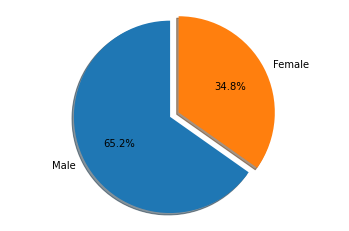

In [5]:
labels = 'Male', 'Female'
sizes = participantsData.gender.value_counts()
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

<AxesSubplot:ylabel='job'>

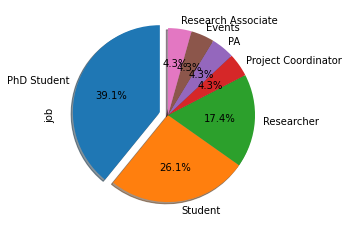

In [6]:
participantsData.job.value_counts().plot(kind='pie', explode=(0.1, 0,0,0,0,0,0) , autopct='%1.1f%%', shadow=True, startangle=90)

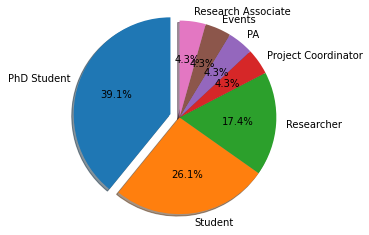

In [18]:
participantsData.job.value_counts()
labels=  participantsData.job.value_counts().index.to_list()
sizes = participantsData.job.value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0.1, 0,0,0,0,0,0),labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Text(0, 0.5, 'Quantity')

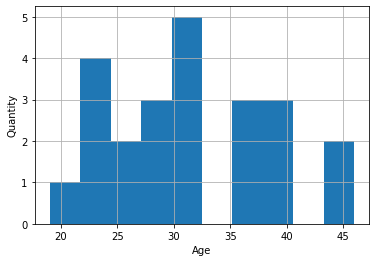

In [19]:
ax = participantsData.age.hist(bins=10)
ax.set_xlabel("Age")
ax.set_ylabel("Quantity")

(-1.2304512342634375,
 1.116870387527256,
 -1.1271909908100894,
 1.1226092531417646)

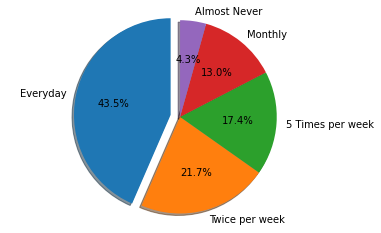

In [22]:
participantsData.oftenDrive.value_counts()
labels= ["Everyday", "Twice per week", "5 Times per week", "Monthly", "Almost Never"]
sizes = participantsData.oftenDrive.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0.1, 0,0,0,0),labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

In [33]:
participantsData.yearsDriving.value_counts()

10    4
4     3
21    2
12    2
1     2
29    1
28    1
20    1
19    1
18    1
17    1
11    1
9     1
6     1
5     1
Name: yearsDriving, dtype: int64

Text(0, 0.5, 'Quantity')

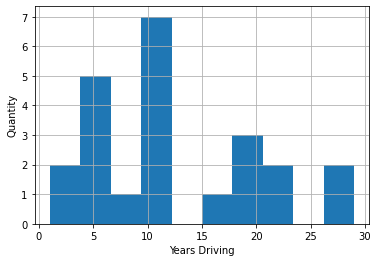

In [35]:
ax = participantsData.yearsDriving.hist(bins=10)
ax.set_xlabel("Years Driving")
ax.set_ylabel("Quantity")

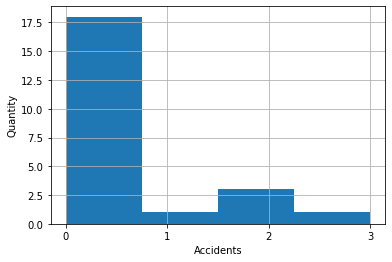

In [100]:
participantsData.accidents.value_counts()
ax = participantsData.accidents.hist(bins=4)
ax.set_xlabel("Accidents")
ax.set_ylabel("Quantity")
ax.set_xticks([0,1,2,3])

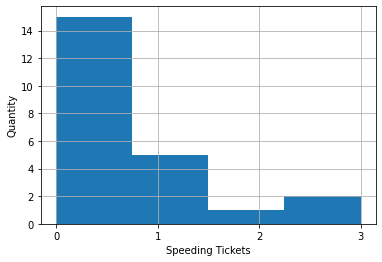

In [101]:
participantsData.speedingTickets.value_counts()
ax = participantsData.speedingTickets.hist(bins=4)
ax.set_xlabel("Speeding Tickets")
ax.set_ylabel("Quantity")
ax.set_xticks([0,1,2,3])

## Scenario's plots

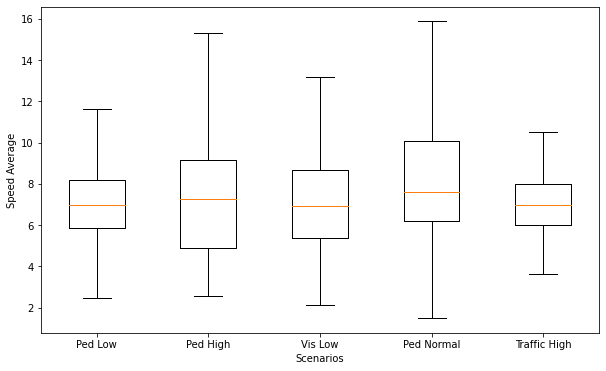

In [5]:
labels = ["Ped Low","Ped High","Vis Low","Ped Normal","Traffic High"]
scenarios = [1,2,3,4,6]

datos = []
for scenario in scenarios:
    datos.append(df[df.scenario == scenario]['speed_total_mean'])


plt.figure(figsize=(10, 6))
plt.boxplot(datos,0, '')
plt.ylabel("Speed Average")
plt.xlabel("Scenarios")
plt.xticks([1,2,3,4,5], labels)
plt.show()

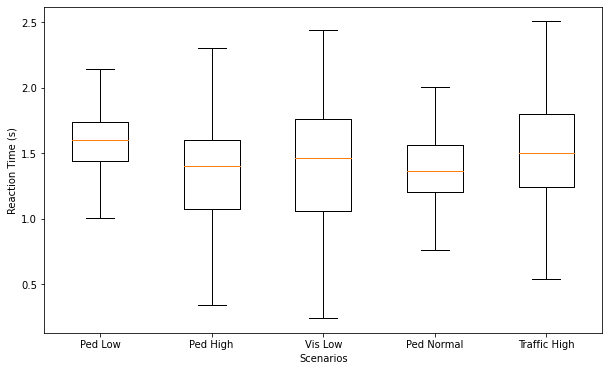

In [6]:
labels = ["Ped Low","Ped High","Vis Low","Ped Normal","Traffic High"]
scenarios = [1,2,3,4,6]

datos = []
for scenario in scenarios:
    datos.append(df[df.scenario == scenario]['reaction_time'])


plt.figure(figsize=(10, 6))
plt.boxplot(datos,0, '')
plt.ylabel("Reaction Time (s)")
plt.xlabel("Scenarios")
plt.xticks([1,2,3,4,5], labels)
plt.show()

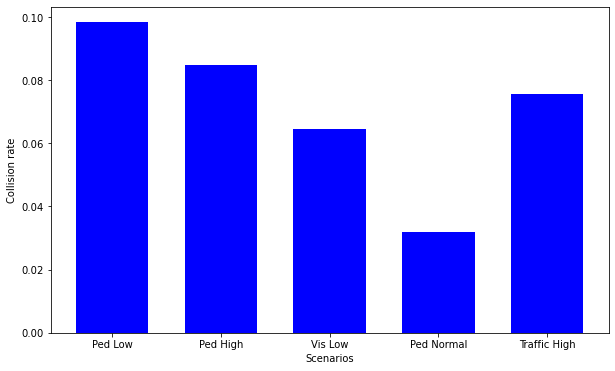

In [7]:
labels = ["Ped Low","Ped High","Vis Low","Ped Normal","Traffic High"]
scenarios = [1,2,3,4,6]

datos = []
for scenario in scenarios:
    datos.append(df[df.scenario == scenario]['hadCollision'].mean())



plt.figure(figsize=(10, 6))
plt.bar(labels, datos,1/1.5,color='blue')
plt.ylabel("Collision rate")
plt.xlabel("Scenarios")

plt.show()

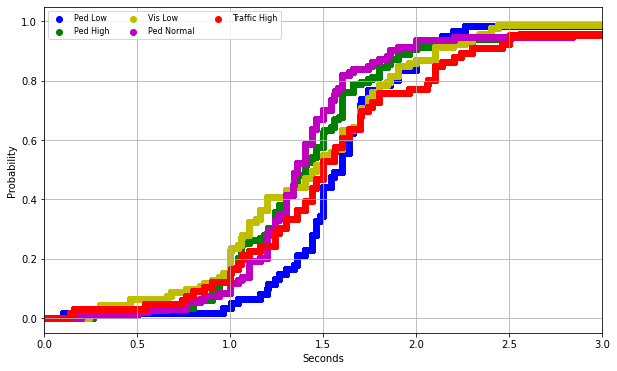

In [14]:
def distProb(x):
    total = len(reactions)
    cant = 0
    for elem in reactions:
        if (x >= elem):
            cant += 1
    prob = cant/total
    return prob

x = np.arange(0, 10, 0.0001)
f = np.vectorize(distProb, otypes=[np.float])

x2 = np.arange(0, 1, 0.01)

def distProb2(x2):
    last_value = 0
    for index,prob in enumerate(distrib):
        if(x2 < prob):
            return last_value
        last_value = x[index]
    return last_value

f2 = np.vectorize(distProb2, otypes=[np.float])


plt.figure(figsize=(10, 6))
plt.ylabel("Probability")
plt.xlabel("Seconds")

labels = ["Ped Low","Ped High","Vis Low","Ped Normal","Traffic High"]
scenarios = [1,2,3,4,6]
colors = ['b', 'g', 'y', 'm', 'r']

plots = []
for scenario, color in zip(scenarios, colors):
    reactions = df[df.scenario == scenario]['reaction_time']
    distrib = f(x)
    probValues = f2(x2)
    
    reactionsTimes = np.concatenate((x , probValues), axis=None)
    probabilities = np.concatenate((distrib , x2), axis=None)

    plots.append(plt.scatter(reactionsTimes, probabilities, marker='o', color=color))



plt.legend(plots,
           labels,
           scatterpoints=1,
           ncol=3,
           fontsize=8)

plt.xlim(0, 3)

 
plt.grid(True)

plt.show()

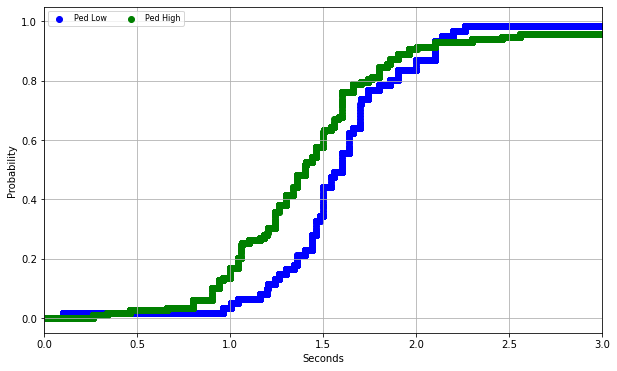

In [18]:
plt.figure(figsize=(10, 6))
plt.ylabel("Probability")
plt.xlabel("Seconds")

labels = ["Ped Low","Ped High"]
scenarios = [1,2]
colors = ['b', 'g', 'y', 'm', 'r']

plots = []
for scenario, color in zip(scenarios, colors):
    reactions = df[df.scenario == scenario]['reaction_time']
    distrib = f(x)
    probValues = f2(x2)
    
    reactionsTimes = np.concatenate((x , probValues), axis=None)
    probabilities = np.concatenate((distrib , x2), axis=None)

    plots.append(plt.scatter(reactionsTimes, probabilities, marker='o', color=color))


plt.legend(plots,
           labels,
           scatterpoints=1,
           ncol=2,
           fontsize=8,
           loc=2)

plt.xlim(0, 3)
 
plt.grid(True)

plt.show()

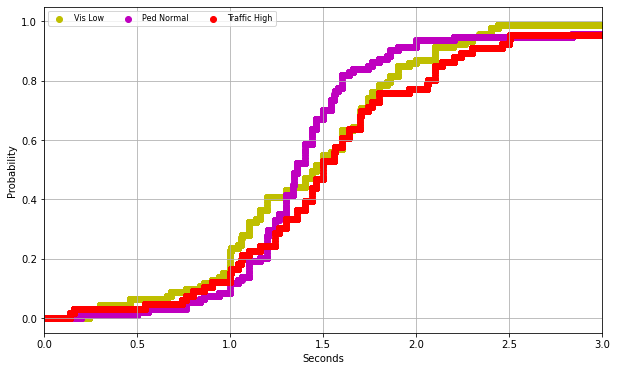

In [17]:
plt.figure(figsize=(10, 6))
plt.ylabel("Probability")
plt.xlabel("Seconds")

labels = ["Vis Low","Ped Normal","Traffic High"]
scenarios = [3,4,6]
colors = ['y', 'm', 'r']

plots = []
for scenario, color in zip(scenarios, colors):
    reactions = df[df.scenario == scenario]['reaction_time']
    distrib = f(x)
    probValues = f2(x2)
    
    reactionsTimes = np.concatenate((x , probValues), axis=None)
    probabilities = np.concatenate((distrib , x2), axis=None)

    plots.append(plt.scatter(reactionsTimes, probabilities, marker='o', color=color))


plt.legend(plots,
           labels,
           scatterpoints=1,
           ncol=3,
           fontsize=8)
 
plt.grid(True)
plt.xlim(0, 3)

plt.show()

## Behaviour plots

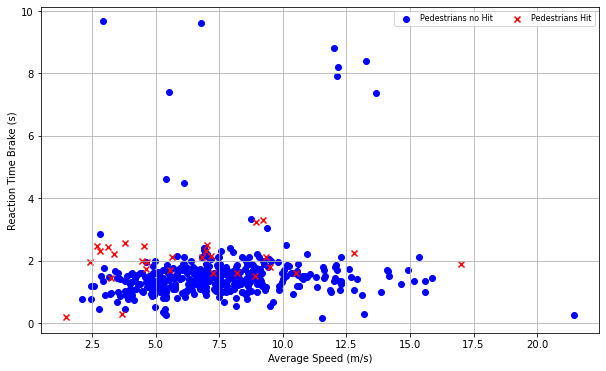

In [19]:
plt.figure(figsize=(10, 6))
plt.xlabel("Average Speed (m/s)")
plt.ylabel("Reaction Time Brake (s)")
reactionPressBrake = df[df.reaction_time > 0.15]
reactionPressBrakeNoHits = reactionPressBrake[reactionPressBrake.hadCollision == 0]
reactionPressBrakeHits = reactionPressBrake[reactionPressBrake.hadCollision == 1]


noHits = plt.scatter(reactionPressBrakeNoHits['speed_total_mean'], reactionPressBrakeNoHits['reaction_time'], marker='o', c='b')
hits = plt.scatter(reactionPressBrakeHits['speed_total_mean'], reactionPressBrakeHits['reaction_time'], marker='x', c='r')

plt.legend(( noHits,  hits),
           ("Pedestrians no Hit", "Pedestrians Hit"),
           scatterpoints=1,
           ncol=2,
           fontsize=8)

plt.grid(True)

plt.show()

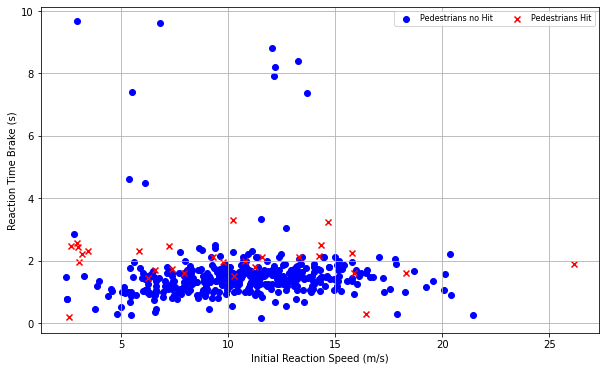

In [16]:
plt.figure(figsize=(10, 6))
plt.xlabel("Initial Reaction Speed (m/s)")
plt.ylabel("Reaction Time Brake (s)")
reactionPressBrake = df[df.reaction_time > 0.15]
reactionPressBrakeNoHits = reactionPressBrake[reactionPressBrake.hadCollision == 0]
reactionPressBrakeHits = reactionPressBrake[reactionPressBrake.hadCollision == 1]


noHits = plt.scatter(reactionPressBrakeNoHits['speed_react'], reactionPressBrakeNoHits['reaction_time'], marker='o', c='b')
hits = plt.scatter(reactionPressBrakeHits['speed_react'], reactionPressBrakeHits['reaction_time'], marker='x', c='r')

plt.legend(( noHits,  hits),
           ("Pedestrians no Hit", "Pedestrians Hit"),
           scatterpoints=1,
           ncol=2,
           fontsize=8)

plt.grid(True)

plt.show()

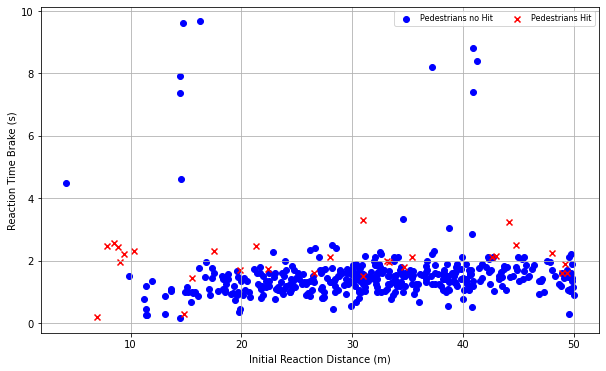

In [17]:
plt.figure(figsize=(10, 6))
plt.xlabel("Initial Reaction Distance (m)")
plt.ylabel("Reaction Time Brake (s)")
reactionPressBrake = df[df.reaction_time > 0.15]
reactionPressBrakeNoHits = reactionPressBrake[reactionPressBrake.hadCollision == 0]
reactionPressBrakeHits = reactionPressBrake[reactionPressBrake.hadCollision == 1]


noHits = plt.scatter(reactionPressBrakeNoHits['distancePed'], reactionPressBrakeNoHits['reaction_time'], marker='o', c='b')
hits = plt.scatter(reactionPressBrakeHits['distancePed'], reactionPressBrakeHits['reaction_time'], marker='x', c='r')

plt.legend(( noHits,  hits),
           ("Pedestrians no Hit", "Pedestrians Hit"),
           scatterpoints=1,
           ncol=2,
           fontsize=8)

plt.grid(True)

plt.show()

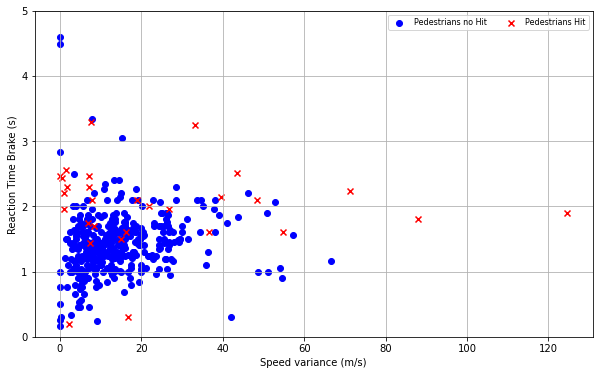

In [8]:
plt.figure(figsize=(10, 6))
plt.xlabel("Speed variance (m/s)")
plt.ylabel("Reaction Time Brake (s)")
reactionPressBrake = df[df.reaction_time > 0.15]
reactionPressBrakeNoHits = reactionPressBrake[reactionPressBrake.hadCollision == 0]
reactionPressBrakeHits = reactionPressBrake[reactionPressBrake.hadCollision == 1]


noHits = plt.scatter(reactionPressBrakeNoHits['speed_total_var'], reactionPressBrakeNoHits['reaction_time'], marker='o', c='b')
hits = plt.scatter(reactionPressBrakeHits['speed_total_var'], reactionPressBrakeHits['reaction_time'], marker='x', c='r')

plt.legend(( noHits,  hits),
           ("Pedestrians no Hit", "Pedestrians Hit"),
           scatterpoints=1,
           ncol=2,
           fontsize=8)

plt.ylim(0, 5)

plt.grid(True)

plt.show()

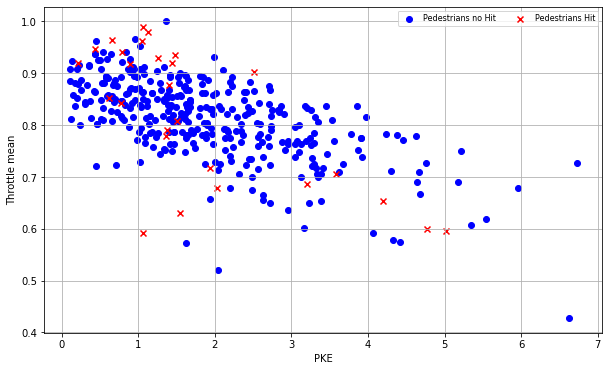

In [6]:
plt.figure(figsize=(10, 6))
plt.xlabel("PKE")
plt.ylabel("Throttle mean")
reactionPressBrakeNoHits = reactionPressBrake[reactionPressBrake.hadCollision == 0]
reactionPressBrakeHits = reactionPressBrake[reactionPressBrake.hadCollision == 1]


noHits = plt.scatter(reactionPressBrakeNoHits['PKE'], reactionPressBrakeNoHits['throttle_total_mean'], marker='o', c='b')
hits = plt.scatter(reactionPressBrakeHits['PKE'], reactionPressBrakeHits['throttle_total_mean'], marker='x', c='r')

plt.legend(( noHits,  hits),
           ("Pedestrians no Hit", "Pedestrians Hit"),
           scatterpoints=1,
           ncol=2,
           fontsize=8)

plt.grid(True)

plt.show()

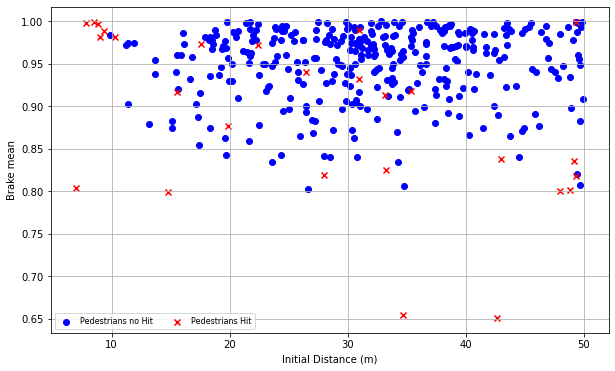

In [9]:
plt.figure(figsize=(10, 6))
plt.xlabel("Initial Distance (m)")
plt.ylabel("Brake mean")
reactionPressBrake = df[df.PKE > 0.15]
reactionPressBrakeNoHits = reactionPressBrake[reactionPressBrake.hadCollision == 0]
reactionPressBrakeHits = reactionPressBrake[reactionPressBrake.hadCollision == 1]


noHits = plt.scatter(reactionPressBrakeNoHits['distancePed'], reactionPressBrakeNoHits['brake_total_mean'], marker='o', c='b')
hits = plt.scatter(reactionPressBrakeHits['distancePed'], reactionPressBrakeHits['brake_total_mean'], marker='x', c='r')

plt.legend(( noHits,  hits),
           ("Pedestrians no Hit", "Pedestrians Hit"),
           scatterpoints=1,
           ncol=2,
           fontsize=8)

plt.grid(True)

plt.show()

## Age plots

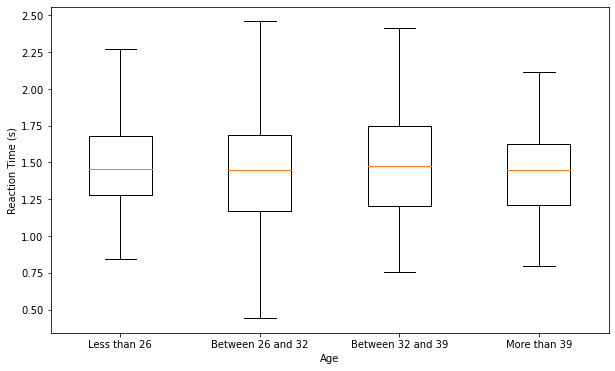

In [151]:
labels = ["Less than 26","Between 26 and 32", "Between 32 and 39","More than 39"]

datos = []
datos.append(df[df.age < 26]['reaction_time'])
datos.append(df[(df.age >= 26) & (df.age <= 32)]['reaction_time'])
datos.append(df[(df.age > 32) & (df.age < 39)]['reaction_time'])
datos.append(df[df.age >= 39]['reaction_time'])



plt.figure(figsize=(10, 6))
plt.boxplot(datos,0, '')
plt.ylabel("Reaction Time (s)")
plt.xlabel("Age")
plt.xticks([1,2,3,4], labels)
#plt.savefig('speedAverageScenariosBoxPlot.pdf')
plt.show()

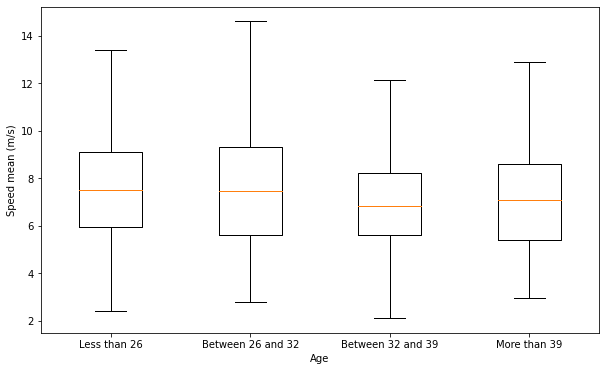

In [152]:
labels = ["Less than 26","Between 26 and 32", "Between 32 and 39","More than 39"]

datos = []
datos.append(df[df.age < 26]['speed_total_mean'])
datos.append(df[(df.age >= 26) & (df.age <= 32)]['speed_total_mean'])
datos.append(df[(df.age > 32) & (df.age < 39)]['speed_total_mean'])
datos.append(df[df.age >= 39]['speed_total_mean'])


plt.figure(figsize=(10, 6))
plt.boxplot(datos,0, '')
plt.ylabel("Speed mean (m/s)")
plt.xlabel("Age")
plt.xticks([1,2,3,4], labels)
plt.show()

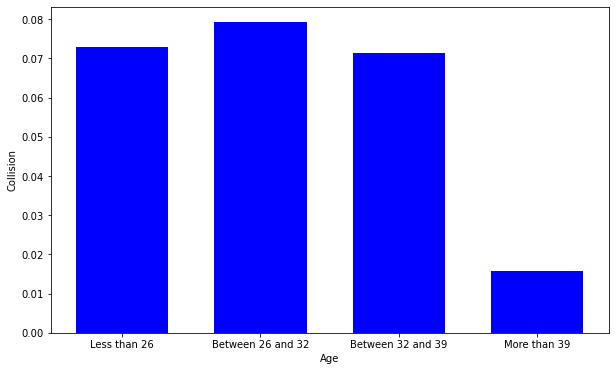

In [153]:
datos = []
datos.append(df[df.age < 26]['hadCollision'].mean())
datos.append(df[(df.age >= 26) & (df.age <= 32)]['hadCollision'].mean())
datos.append(df[(df.age > 32) & (df.age < 39)]['hadCollision'].mean())
datos.append(df[df.age >= 39]['hadCollision'].mean())

plt.figure(figsize=(10, 6))
plt.bar(labels, datos,1/1.5,color='blue')
plt.ylabel("Collision")
plt.xlabel("Age")

plt.show()

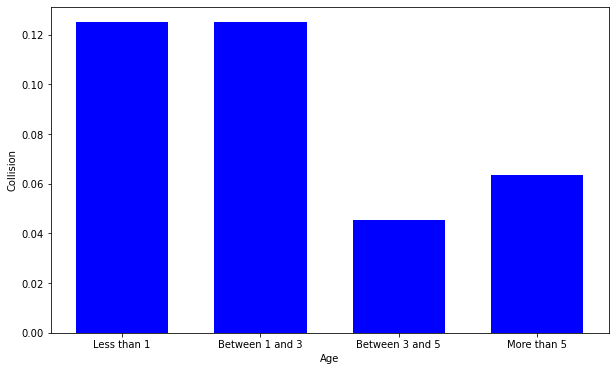

In [156]:
labels = ["Less than 1","Between 1 and 3","Between 3 and 5","More than 5"]

datos = []
datos.append(df[df.yearsDriving <= 1]['hadCollision'].mean())
datos.append(df[(df.yearsDriving >= 1) & (df.yearsDriving < 3)]['hadCollision'].mean())
datos.append(df[(df.yearsDriving >= 3) & (df.yearsDriving < 5)]['hadCollision'].mean())
datos.append(df[df.yearsDriving >= 5]['hadCollision'].mean())



plt.figure(figsize=(10, 6))
plt.bar(labels, datos,1/1.5,color='blue')
plt.ylabel("Collision")
plt.xlabel("Age")

plt.show()